In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
df = pd.read_csv('d:/forecast/forecast/data/sales_BYA.csv', encoding='unicode_escape')

C:\Users\user\AppData\Local\Temp\ipykernel_18268\4182549881.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('d:/forecast/forecast/data/sales_BYA.csv', encoding='unicode_escape')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353596 entries, 0 to 353595
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CID                   353596 non-null  int64  
 1   Item Type_id          353596 non-null  int64  
 2   Category              353596 non-null  object 
 3   date                  353596 non-null  object 
 4   outlet_id             353596 non-null  int64  
 5   wire                  353596 non-null  int64  
 6   rm                    353596 non-null  float64
 7   wire.1                353596 non-null  int64  
 8   fy                    353596 non-null  int64  
 9   Base Size             353596 non-null  object 
 10  client_id             353596 non-null  object 
 11  qtym                  353596 non-null  float64
 12  Net Price             353596 non-null  float64
 13  Grade                 353596 non-null  object 
 14  Uses                  353596 non-null  object 
 15  

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df = df[['date','Net Price', 'qtym']]
df.set_index('date',inplace=True)
df.sort_index(inplace=True)

In [18]:
df.head()

,Net Price,qtym
date,,
2019-07-01,283187.06890,14020.55
2019-07-01,82878.13012,2399.50
2019-07-01,13582.56480,442.40
2019-07-01,41816.58453,1210.68
2019-07-01,163013.22840,5663.50


<center><b>Trend Analysis</b></center>

In [19]:
tdf = df.reset_index().groupby('date').agg(['min', 'median', 'mean', 'max', 'sum'])
tdf

Net Price                                            \
                    min        median          mean           max   
date                                                                
2019-07-01  1087.736286  13540.963590  32964.019949  3.046954e+06   
2019-07-02  1358.139101  13485.546480  23492.716410  6.070879e+05   
2019-07-04  1631.510244  13969.415105  21855.391620  1.443268e+05   
2019-07-06   969.540600  13560.944670  24913.612171  2.019841e+05   
2019-07-07  1445.159333  13851.512350  22258.220960  1.829371e+05   
...                 ...           ...           ...           ...   
2023-06-25  2248.400000   6009.465000   8110.280833  2.258563e+04   
2023-06-26    36.812681  11042.978100  15231.674666  1.060595e+05   
2023-06-27  1395.193800  11056.575000  18362.626180  1.117882e+05   
2023-06-28  1143.780750  10804.648750  15655.478532  1.464804e+05   
2023-06-29  1341.532500  10945.825800  47049.670970  2.858117e+06   

                             qtym                                               
                     sum      min  median         mean        max          sum  
date                                                                            
2019-07-01  2.627232e+07   61.500  429.68  1033.804122   73125.00  823941.8850  
2019-07-02  1.510582e+07   61.850  421.40   821.901944   26217.50  528482.9500  
2019-07-04  5.594980e+06   61.850  366.08   772.868359    7519.40  197854.3000  
2019-07-06  9.242950e+06   54.320  438.16   903.101105   10213.68  335050.5100  
2019-07-07  9.014579e+06   36.112  378.60   776.027067    9661.00  314290.9620  
...                  ...      ...     ...          ...        ...          ...  
2023-06-25  4.866168e+04  100.000  200.00   274.666667     648.00    1648.0000  
2023-06-26  2.878787e+06    1.070  372.00   531.799312    3158.00  100510.0700  
2023-06-27  4.076503e+06   75.000  364.00   664.161261    4980.00  147443.8000  
2023-06-28  5.416796e+06   63.000  362.00   554.952023    7125.00  192013.4000  
2023-06-29  2.074890e+07   46.000  365.00  1517.643727  140600.00  669280.8836  

[1149 rows x 10 columns]

In [20]:
tdf['Net Price']

,min,median,mean,max,sum
date,,,,,
2019-07-01,1087.736286,13540.963590,32964.019949,3.046954e+06,2.627232e+07
2019-07-02,1358.139101,13485.546480,23492.716410,6.070879e+05,1.510582e+07
2019-07-04,1631.510244,13969.415105,21855.391620,1.443268e+05,5.594980e+06
2019-07-06,969.540600,13560.944670,24913.612171,2.019841e+05,9.242950e+06
2019-07-07,1445.159333,13851.512350,22258.220960,1.829371e+05,9.014579e+06
...,...,...,...,...,...
2023-06-25,2248.400000,6009.465000,8110.280833,2.258563e+04,4.866168e+04
2023-06-26,36.812681,11042.978100,15231.674666,1.060595e+05,2.878787e+06
2023-06-27,1395.193800,11056.575000,18362.626180,1.117882e+05,4.076503e+06


In [21]:
tdf['day'] = tdf.index.day
tdf['month'] = tdf.index.month
tdf['year'] = tdf.index.year
tdf['timestamp'] = tdf.index

In [2]:
5.416796e-06

5.416796e-06

In [22]:
tdf

Net Price                                            \
                    min        median          mean           max   
date                                                                
2019-07-01  1087.736286  13540.963590  32964.019949  3.046954e+06   
2019-07-02  1358.139101  13485.546480  23492.716410  6.070879e+05   
2019-07-04  1631.510244  13969.415105  21855.391620  1.443268e+05   
2019-07-06   969.540600  13560.944670  24913.612171  2.019841e+05   
2019-07-07  1445.159333  13851.512350  22258.220960  1.829371e+05   
...                 ...           ...           ...           ...   
2023-06-25  2248.400000   6009.465000   8110.280833  2.258563e+04   
2023-06-26    36.812681  11042.978100  15231.674666  1.060595e+05   
2023-06-27  1395.193800  11056.575000  18362.626180  1.117882e+05   
2023-06-28  1143.780750  10804.648750  15655.478532  1.464804e+05   
2023-06-29  1341.532500  10945.825800  47049.670970  2.858117e+06   

                             qtym                                  \
                     sum      min  median         mean        max   
date                                                                
2019-07-01  2.627232e+07   61.500  429.68  1033.804122   73125.00   
2019-07-02  1.510582e+07   61.850  421.40   821.901944   26217.50   
2019-07-04  5.594980e+06   61.850  366.08   772.868359    7519.40   
2019-07-06  9.242950e+06   54.320  438.16   903.101105   10213.68   
2019-07-07  9.014579e+06   36.112  378.60   776.027067    9661.00   
...                  ...      ...     ...          ...        ...   
2023-06-25  4.866168e+04  100.000  200.00   274.666667     648.00   
2023-06-26  2.878787e+06    1.070  372.00   531.799312    3158.00   
2023-06-27  4.076503e+06   75.000  364.00   664.161261    4980.00   
2023-06-28  5.416796e+06   63.000  362.00   554.952023    7125.00   
2023-06-29  2.074890e+07   46.000  365.00  1517.643727  140600.00   

                        day month  year  timestamp  
                    sum                             
date                                                
2019-07-01  823941.8850   1     7  2019 2019-07-01  
2019-07-02  528482.9500   2     7  2019 2019-07-02  
2019-07-04  197854.3000   4     7  2019 2019-07-04  
2019-07-06  335050.5100   6     7  2019 2019-07-06  
2019-07-07  314290.9620   7     7  2019 2019-07-07  
...                 ...  ..   ...   ...        ...  
2023-06-25    1648.0000  25     6  2023 2023-06-25  
2023-06-26  100510.0700  26     6  2023 2023-06-26  
2023-06-27  147443.8000  27     6  2023 2023-06-27  
2023-06-28  192013.4000  28     6  2023 2023-06-28  
2023-06-29  669280.8836  29     6  2023 2023-06-29  

[1149 rows x 14 columns]

In [23]:
sns.set(style='darkgrid')

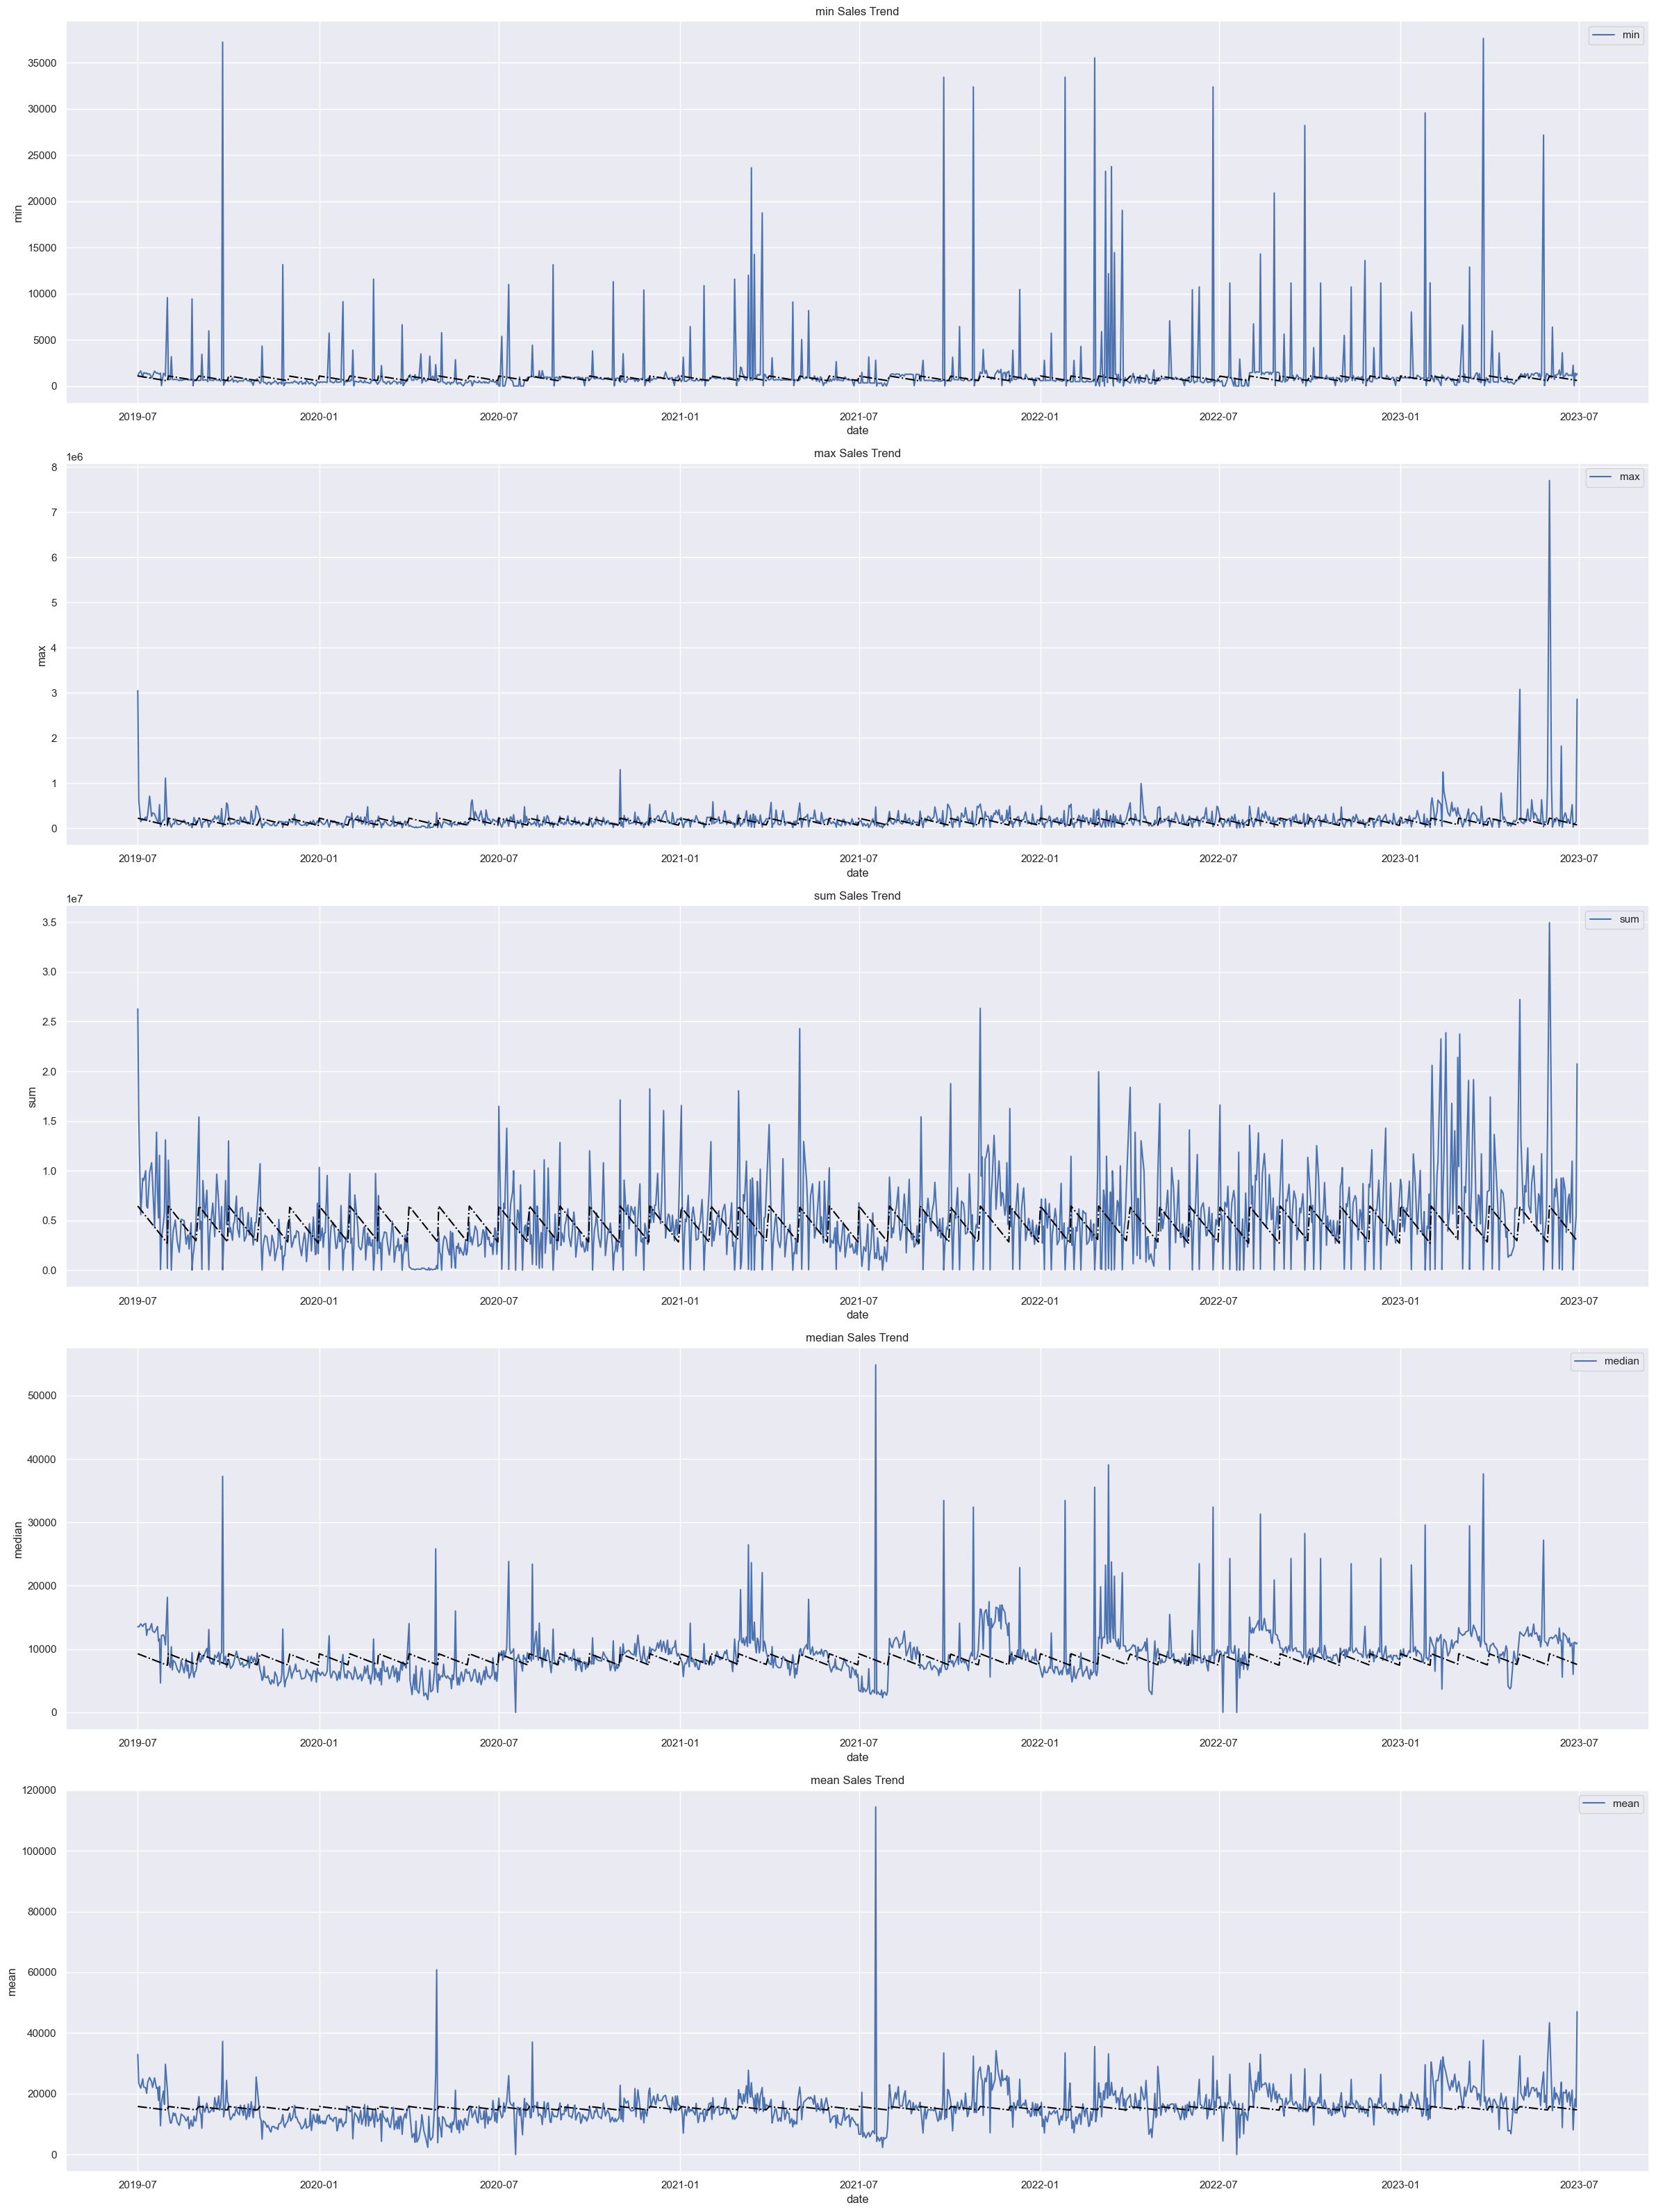

In [35]:
cols = ['min', 'max',  'sum', 'median', 'mean']
fig, grid = plt.subplots(5, 1, figsize=(24, 32))
colId = 0
for row in range(5):
    feature = cols[colId]
    # Extract the date index as a numerical variable
    x_values = tdf.index.day.values.reshape(-1, 1)

    # Fit a linear regression model to estimate the trend
    reg = SGDRegressor(max_iter=1000,random_state=33).fit(x_values, tdf['Net Price'][feature])

    # Get the trend line
    trend_line = reg.predict(x_values)
    
    sns.lineplot(data=tdf['Net Price'], ax=grid[row], x='date', y=feature, label=feature)
    grid[row].plot(tdf.index.values, trend_line, label="Trend Line", color='black', linestyle='dashdot')
    grid[row].set_title(f'{feature} Sales Trend')
    colId += 1
plt.tight_layout()
plt.savefig('daily-sales-trends.png', dpi=300)
plt.show()

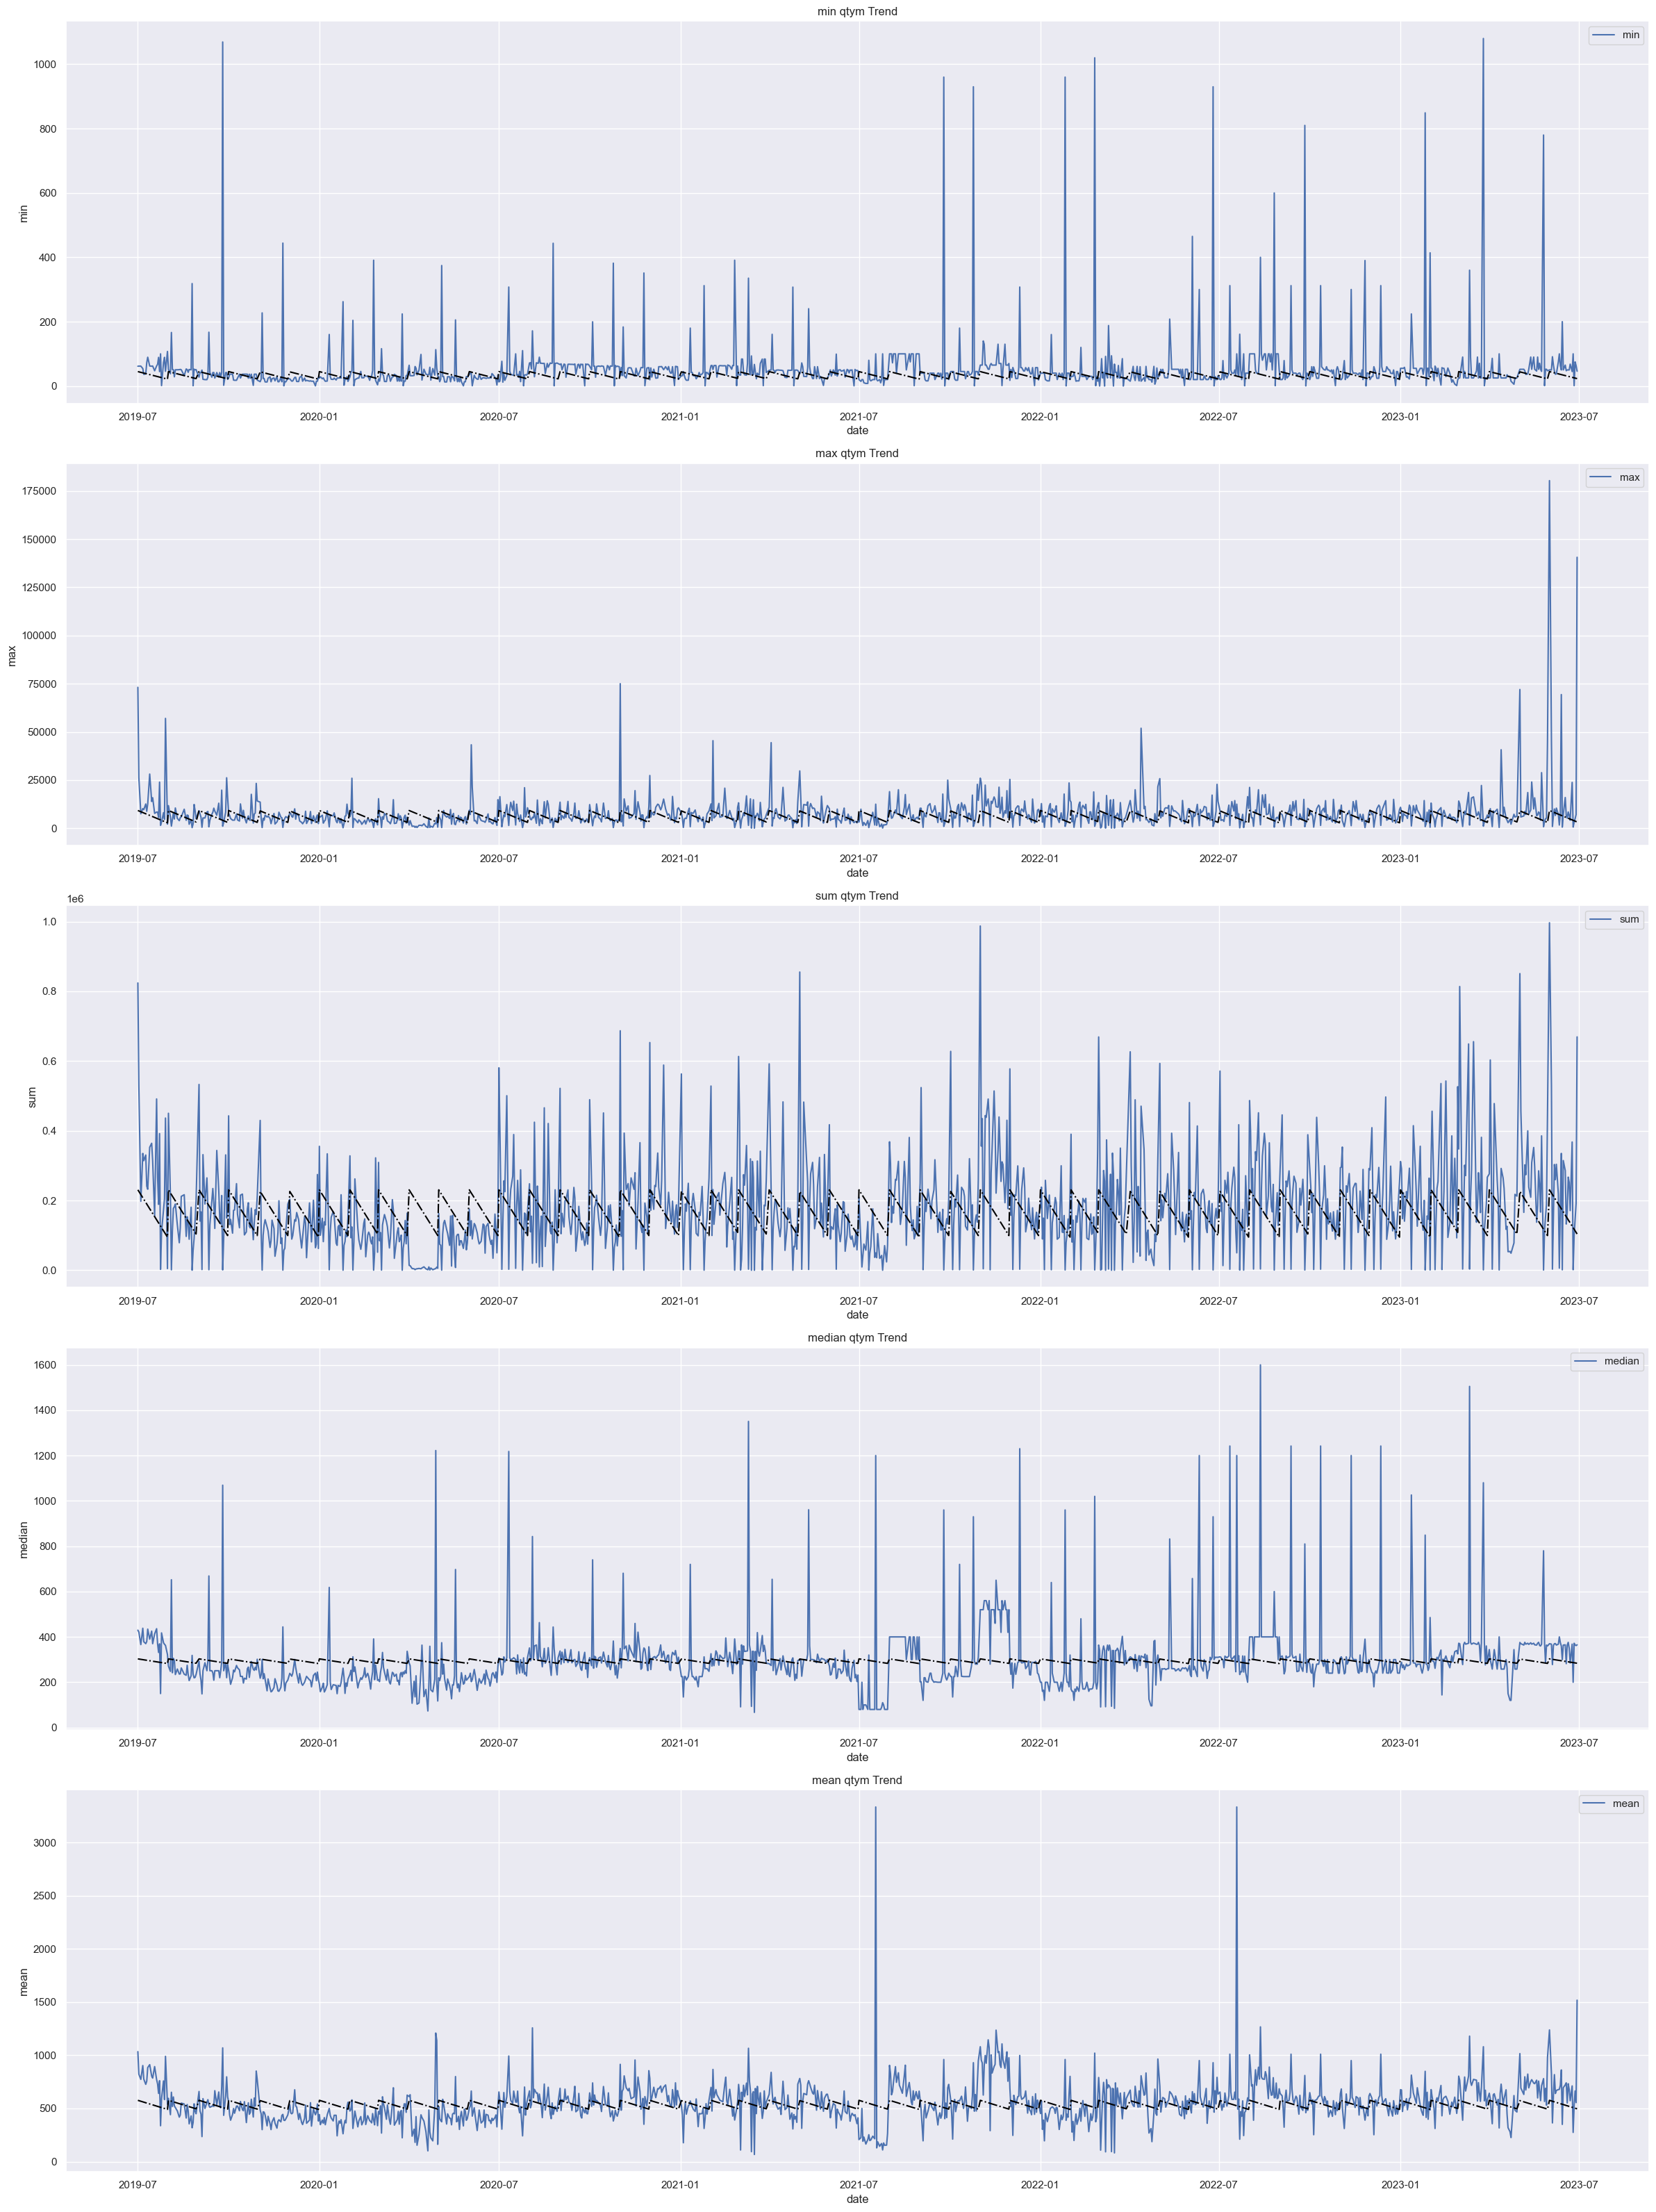

In [36]:
cols = ['min', 'max',  'sum', 'median', 'mean']
fig, grid = plt.subplots(5, 1, figsize=(24, 32))
colId = 0
for row in range(5):
    feature = cols[colId]
    # Extract the date index as a numerical variable
    x_values = tdf.index.day.values.reshape(-1, 1)

    # Fit a linear regression model to estimate the trend
    reg = SGDRegressor(max_iter=1000,random_state=33).fit(x_values, tdf['qtym'][feature])

    # Get the trend line
    trend_line = reg.predict(x_values)
    
    sns.lineplot(data=tdf['qtym'], ax=grid[row], x='date', y=feature, label=feature)
    grid[row].plot(tdf.index.values, trend_line, label="Trend Line", color='black', linestyle='dashdot')
    grid[row].set_title(f'{feature} qtym Trend')
    colId += 1
plt.tight_layout()
plt.savefig('daily-qtym-trends.png', dpi=300)
plt.show()

<center><b>Seasonality Analysis</b></center>

In [28]:
mdf = df.resample('M').agg(['min', 'median', 'mean', 'max', 'sum'])

In [29]:
mdf.head()

Net Price                                                          \
                  min        median          mean           max           sum   
date                                                                            
2019-07-31  46.268719  12920.629680  23574.761354  3.046954e+06  1.875372e+08   
2019-08-31  28.802959   7040.296872  11965.804890  2.354374e+05  7.829226e+07   
2019-09-30  79.435125   8582.557500  16248.904378  5.562406e+05  1.282526e+08   
2019-10-31  70.167694   8084.465070  14758.821776  4.943588e+05  1.171850e+08   
2019-11-30  20.181696   5440.652557  10062.537880  2.343917e+05  6.350468e+07   

                qtym                                                     
                 min      median        mean          max           sum  
date                                                                     
2019-07-31  1.350000  390.000000  812.005689  73125.00000  6.459505e+06  
2019-08-31  0.985411  245.490336  494.103484  12348.81838  3.232919e+06  
2019-09-30  2.310000  250.800000  569.001654  26195.40000  4.491130e+06  
2019-10-31  2.040500  251.680000  514.851243  23280.04800  4.087919e+06  
2019-11-30  0.690459  199.135529  408.740697  13570.61900  2.579563e+06

In [30]:
mdf.shape

(48, 10)

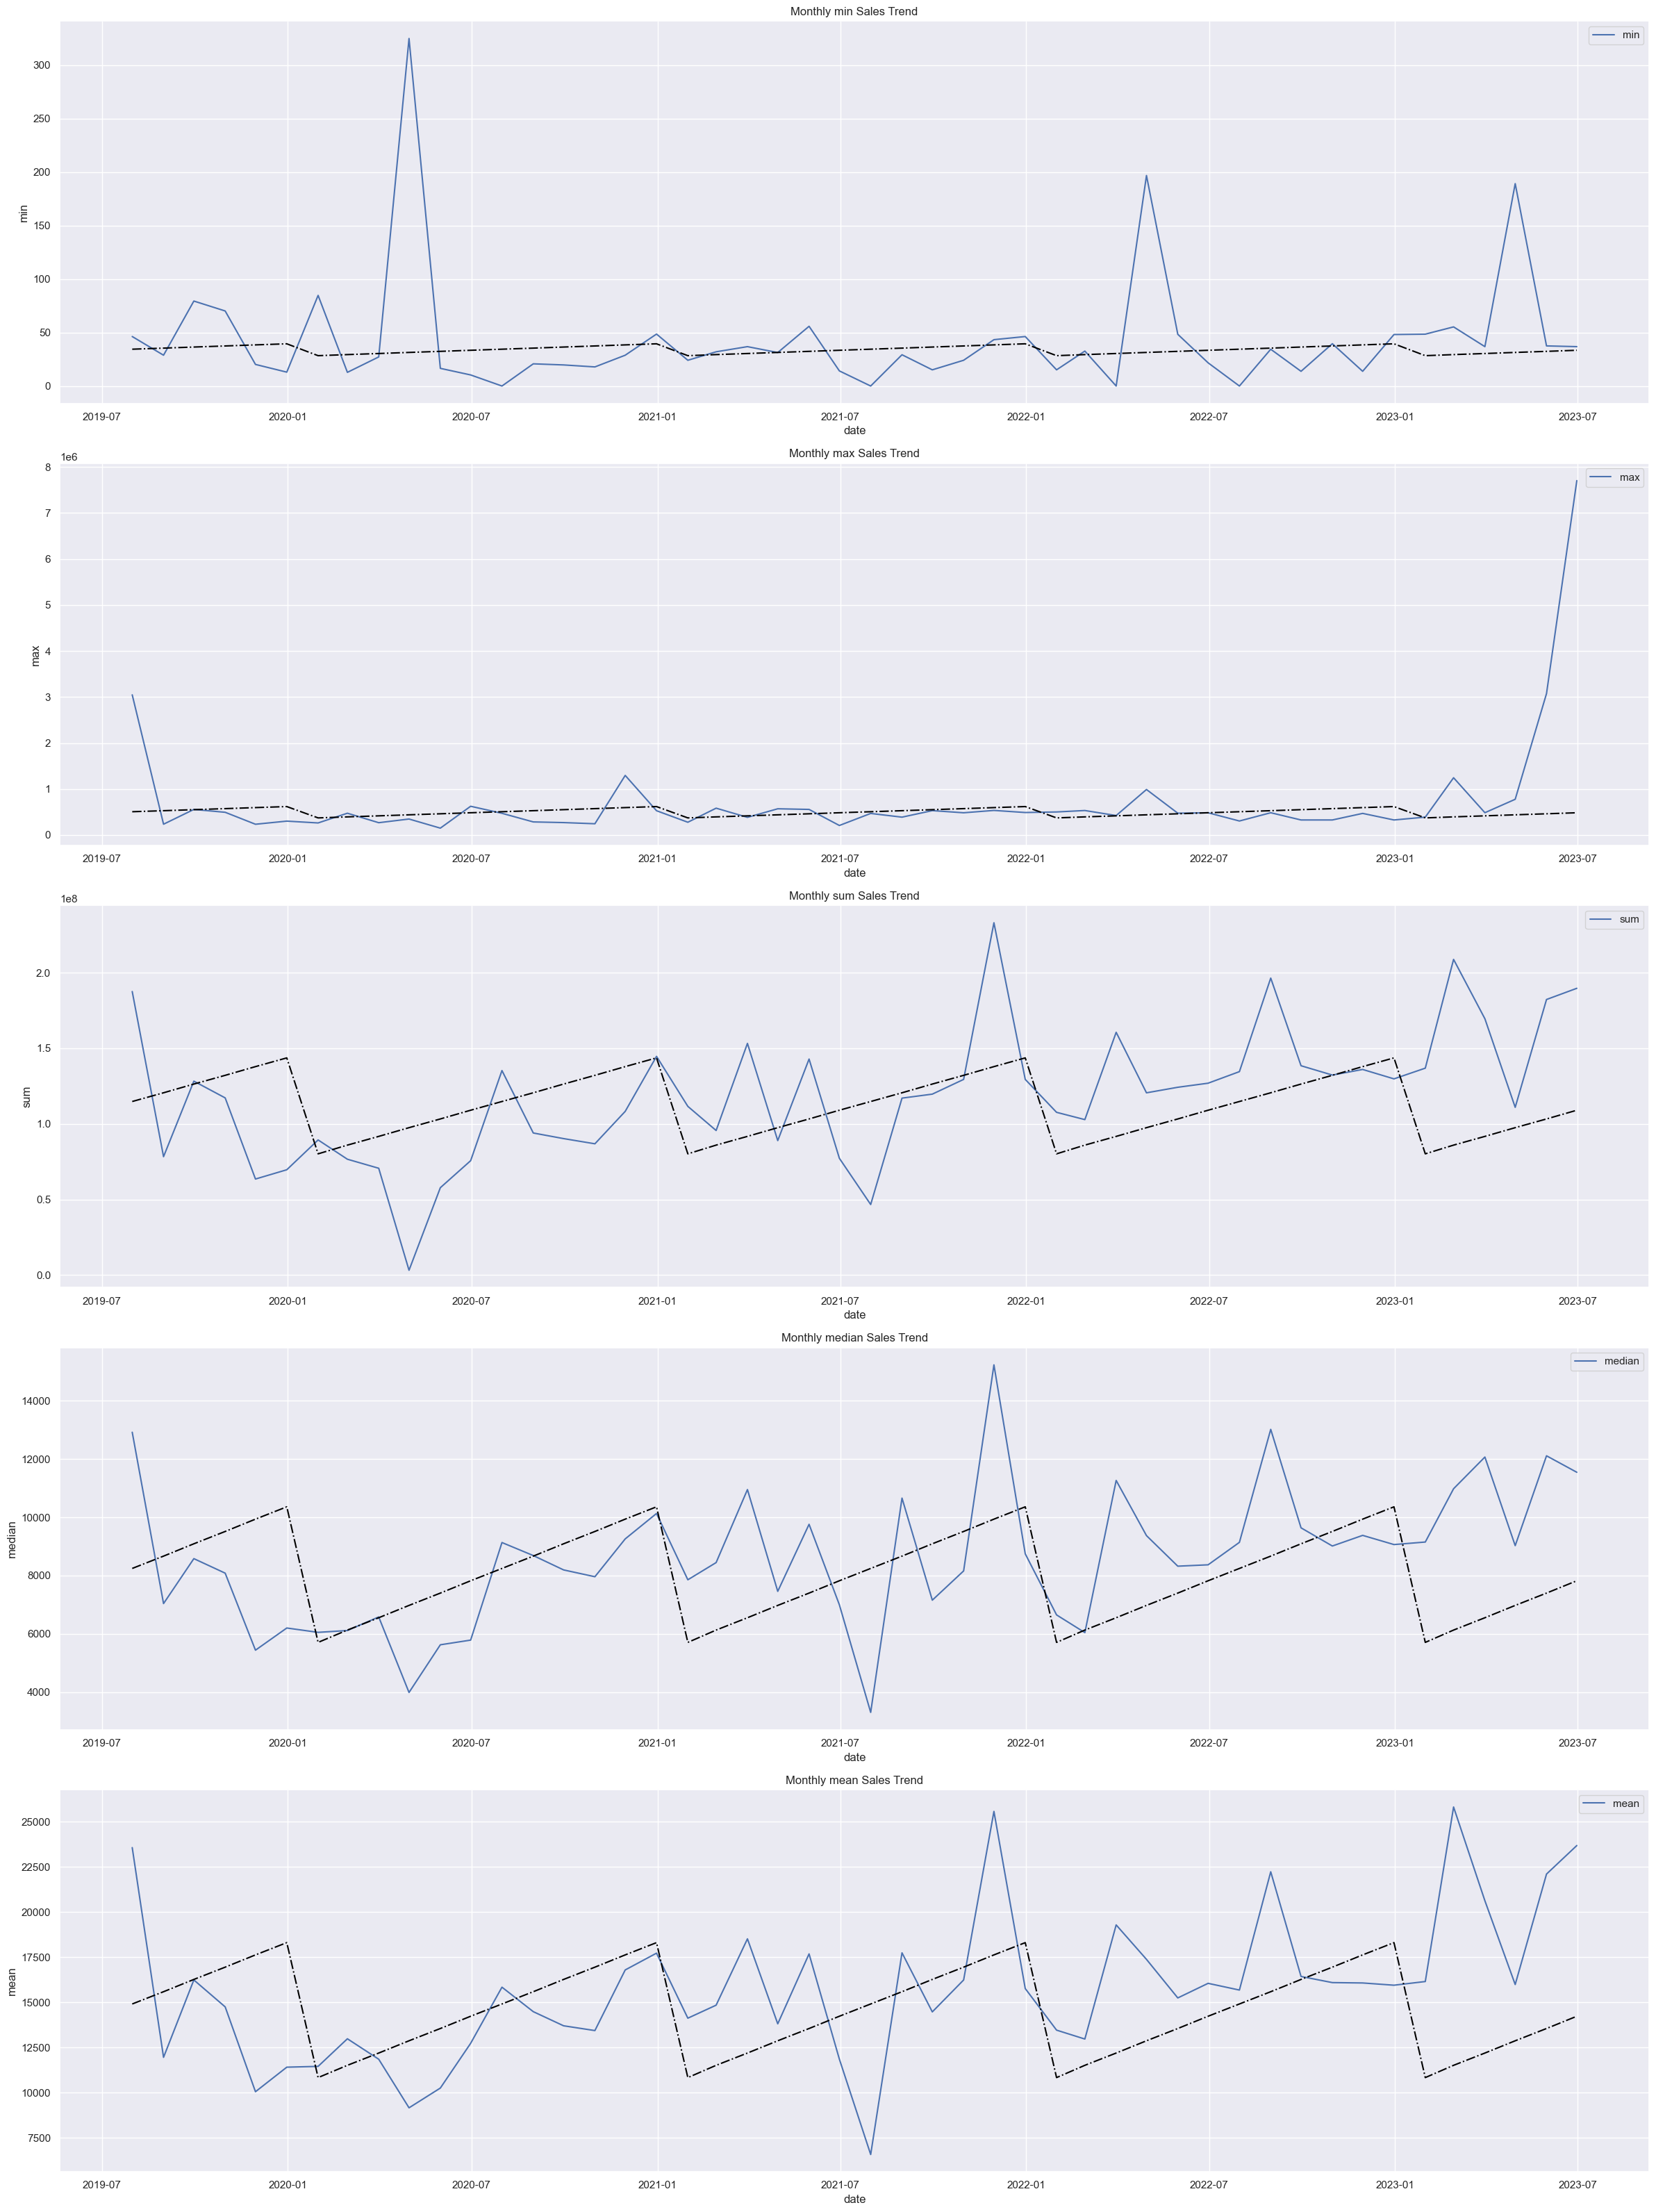

In [37]:
cols = ['min', 'max',  'sum', 'median', 'mean']
fig, grid = plt.subplots(5, 1, figsize=(24, 32))
colId = 0
for row in range(5):
    feature = cols[colId]
    # Extract the date index as a numerical variable
    x_values = mdf.index.month.values.reshape(-1, 1)

    # Fit a linear regression model to estimate the trend
    reg = SGDRegressor(max_iter=1000,random_state=33).fit(x_values, mdf['Net Price'][feature])

    # Get the trend line
    trend_line = reg.predict(x_values)
    
    sns.lineplot(data=mdf['Net Price'], ax=grid[row], x='date', y=feature, label=feature)
    grid[row].plot(mdf.index.values, trend_line, label="Trend Line", color='black', linestyle='dashdot')
    grid[row].set_title(f'Monthly {feature} Sales Trend')
    colId += 1
plt.tight_layout()
plt.savefig('monthly-sales-trend.png', dpi=300)
plt.show()

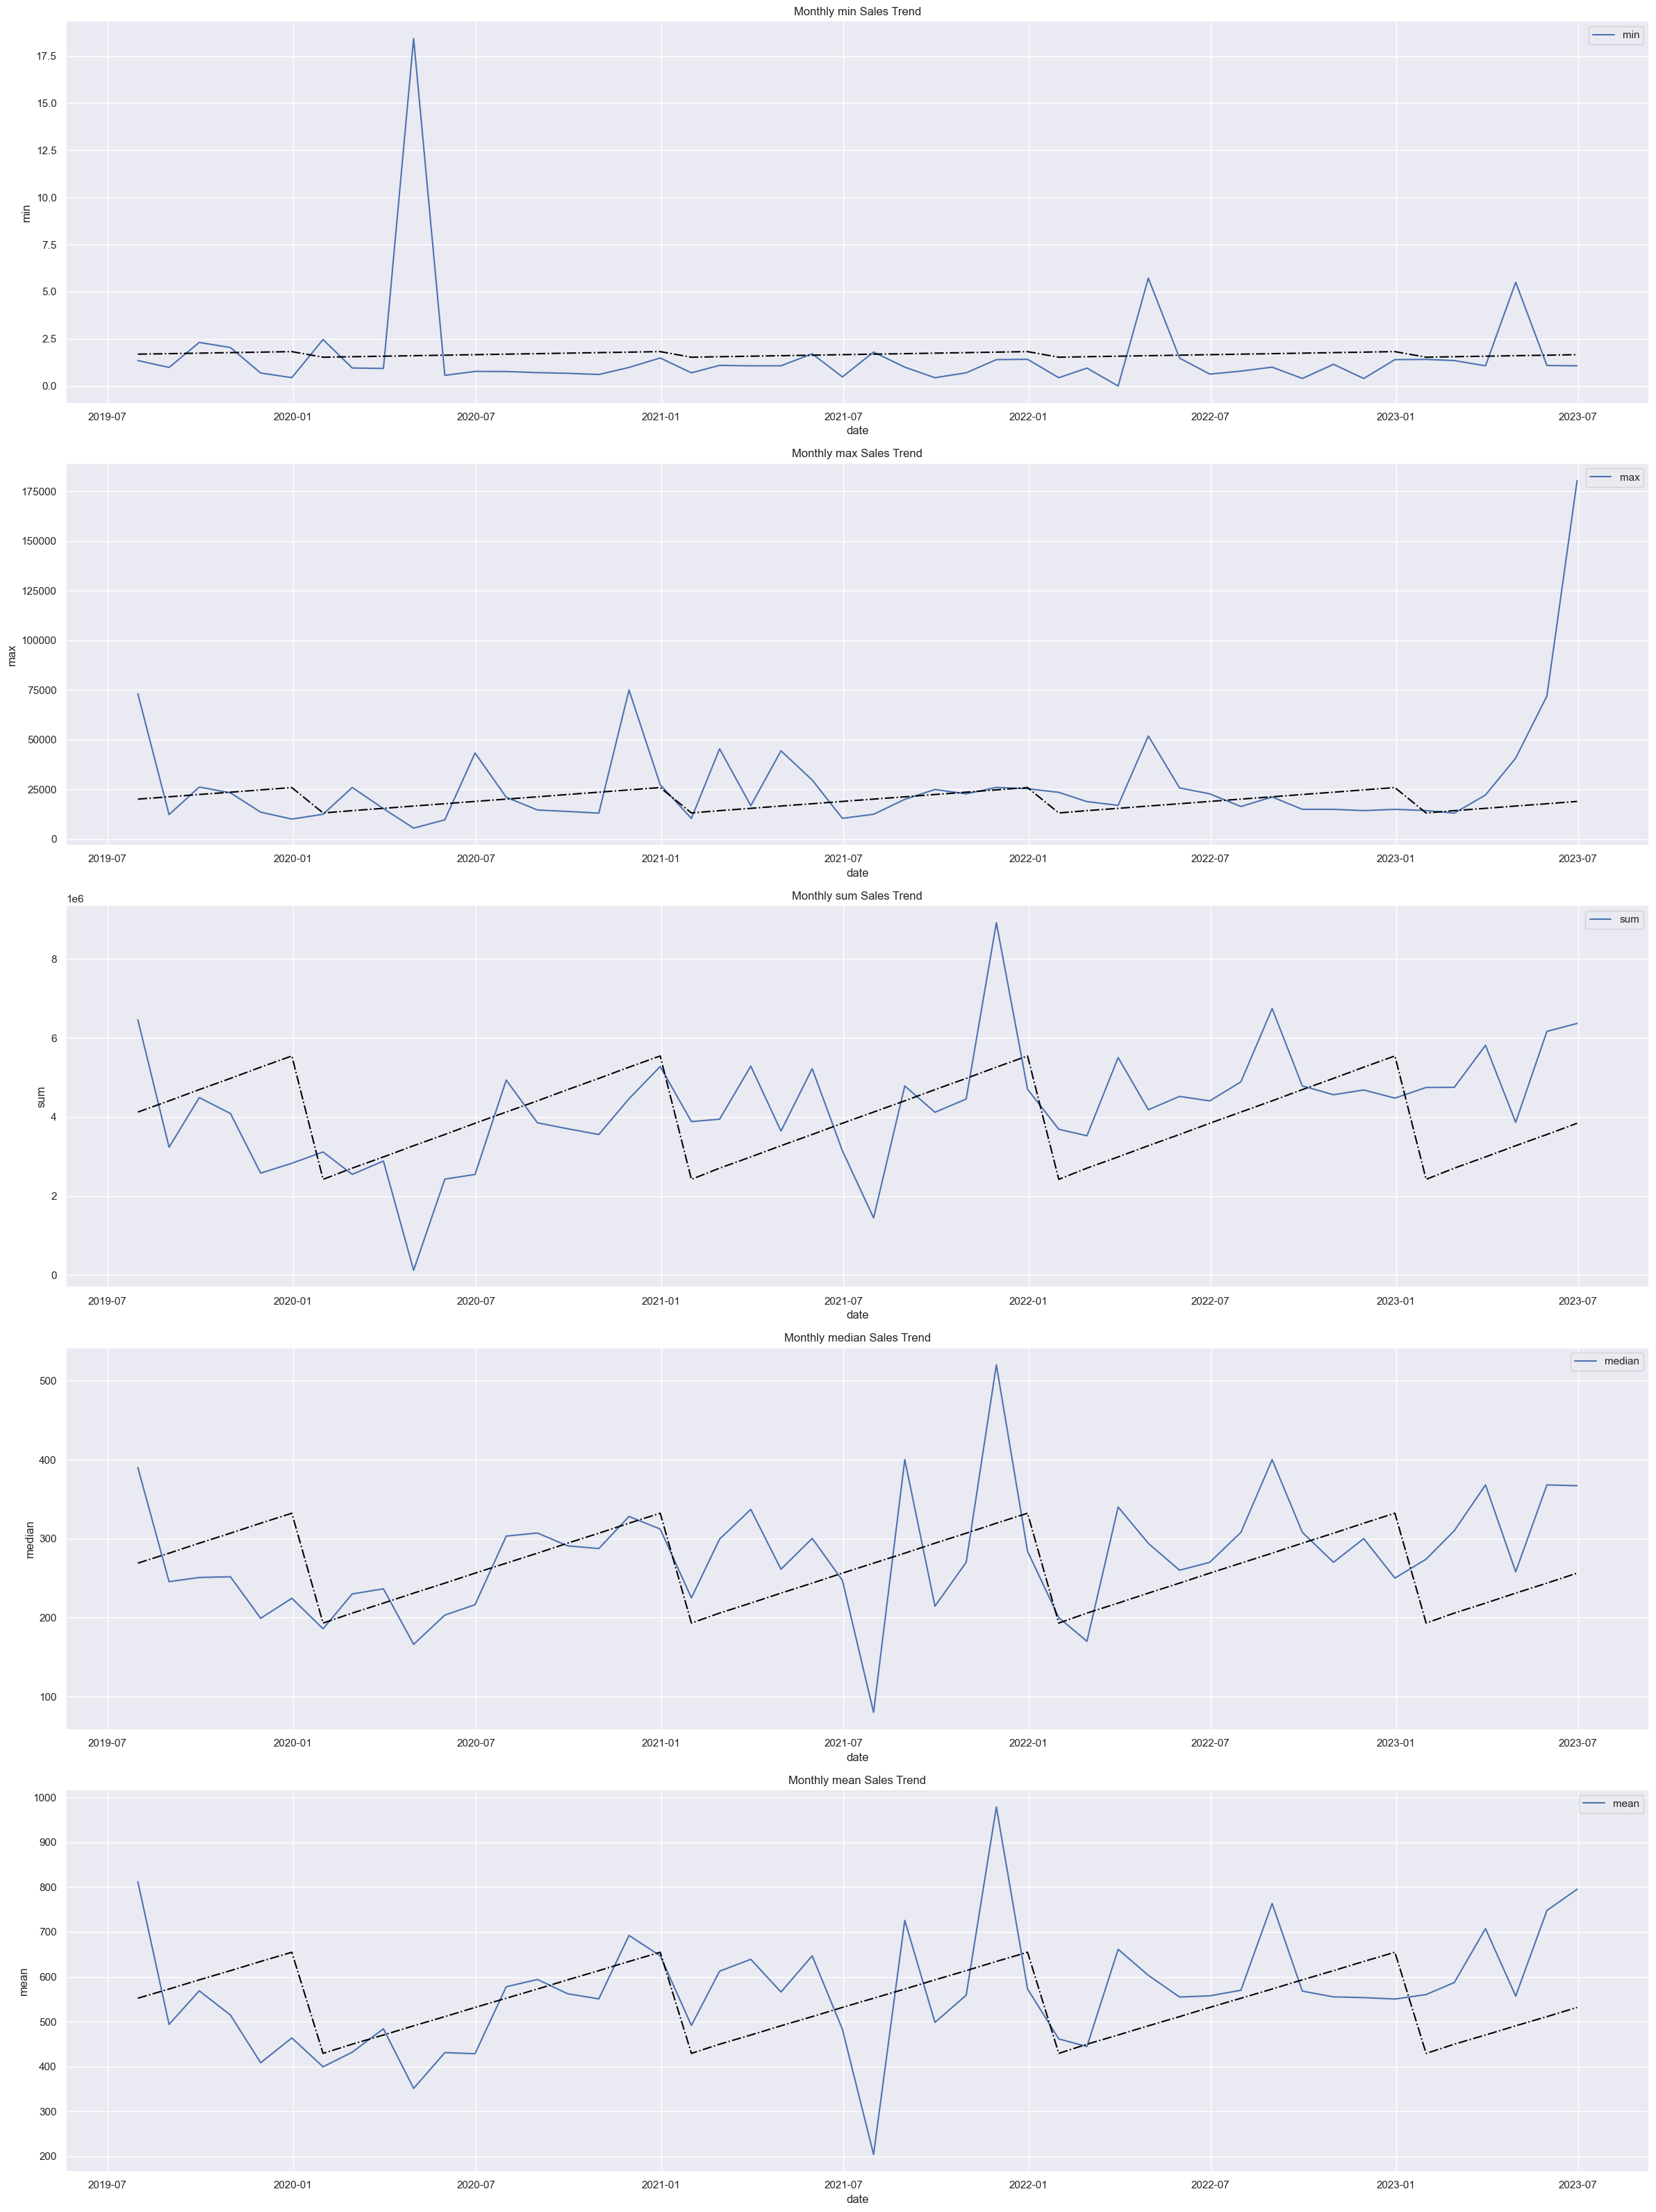

In [39]:
cols = ['min', 'max',  'sum', 'median', 'mean']
fig, grid = plt.subplots(5, 1, figsize=(24, 32))
colId = 0
for row in range(5):
    feature = cols[colId]
    # Extract the date index as a numerical variable
    x_values = mdf.index.month.values.reshape(-1, 1)

    # Fit a linear regression model to estimate the trend
    reg = SGDRegressor(max_iter=1000,random_state=33).fit(x_values, mdf['qtym'][feature])

    # Get the trend line
    trend_line = reg.predict(x_values)
    
    sns.lineplot(data=mdf['qtym'], ax=grid[row], x='date', y=feature, label=feature)
    grid[row].plot(mdf.index.values, trend_line, label="Trend Line", color='black', linestyle='dashdot')
    grid[row].set_title(f'Monthly {feature} Sales Trend')
    colId += 1
plt.tight_layout()
plt.savefig('monthly-sales-trend.png', dpi=300)
plt.show()

<center><b> Stationarity Analysis </b></center> 

In [57]:
# check stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [58]:
# Perform the ADF test on the time series data
result = adfuller(tdf['Net Price']['sum'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the results
print("ADF Test Statistic:", round(test_statistic,4))
print("p-value:", p_value)


ADF Test Statistic: -4.9756
p-value: 2.4798601246184755e-05


In [59]:
# Perform the KPSS test on the time series data
result = kpss(tdf['Net Price']['sum'])

# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the results
print("KPSS Test Statistic:", test_statistic)
print("p-value:", p_value)


KPSS Test Statistic: 2.5833219029585424
p-value: 0.01


C:\Users\user\AppData\Local\Temp\ipykernel_18268\2879970406.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(tdf['Net Price']['sum'])


In [ ]:
### Time Series is Stationary as p-values < 0.05

<center><b>Auto-correlation Check</b></center>

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

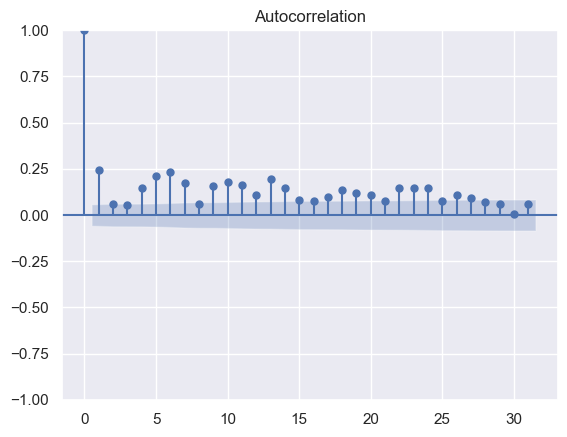

In [62]:
# Plot the ACF
plot_acf(tdf['Net Price']['sum'])
plt.show()